In [ ]:
"""Maszyna wektorów nośnych (SVM), K-najbliższych sąsiadów, drzewa decyzyjne, lasy losowe, zespoły klasyfikatorów
(Metoda: uczenie nadzorowane, zasotosowanie: klasyfikacja) 
Laboratorium 8"""

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
"""Problem 1
Proszę o pobranie danych ze źródła:
https://www.kaggle.com/datasets/soumallyabishayee/analysis-of-infection-by-mouse

Zbiór danych dotyczy symulacji badań medycznych mysz, w którym myszom zakażonym wirusem podano różne dawki dwóch leków, a następnie 2 tygodnie później sprawdzono, czy nadal są zakażone. Celem jest stworzenie modelu klasyfikacji wykorzystując SVM, który pozwoli przewidzieć, czy dana mysz nadal będzie zarażona wirusem. Ponadto problem dotyczy odpowiedniego doboru hiperparametrów i funcji jądra SVM.

1. Wczytanie danych.
2. Analiza zbioru danych:
	2.1. Sprawdzenie kompletności danych.
	2.2. Wizualizacja: Wykres punktowy Med_1_mL vs Med_2_mL różnicowany na podstawie zakażenia wirusem.
	2.3. Utworzenie hiperpłaszczyzny rodzielającej (linia prosta w 2D), gdzie x jest reprezentowany przez tablicę z 100 równo rozłożonymi wartościami w zakresie od 0 do 10, współczynnik kierunkowy prostej jest równy -1, a punkt przecięcia z osią y to 11.

4. Podział zbioru danych:
 	X - zbiór cech,
	y - atrybut decyzyjny - informacja o zakażeniu.
5. Stworzenie modelu SVM korzystając z klasy SVC z liniową funkcją jądra i hiperparametrem regularyzacji równym 1000.
6. Korzystając z odpowiedniego modułu svm zaimportować granice marginesu twardego, zastosować do wygenerowanego modelu, a następnie wygenerować wykres zależności Med_1_mL vs Med_2_mL (punktowy).
7. Zmienić wartość parametru regularyzacji na 0.05 i dalej postępować jak w punkcie 6.
8. Dobór odpowiedniej funkcji jądra dla modelu SVC (dla każdej kombinacji należy wygenerować wykres punktowy Med_1_mL vs Med_2_mL z odpowiednimi marginesami):
	8.1. Kernel rbf dla C=1,
	8.2. Kernel sigmoidalny,
	8.3. Kernel wielomianowy dla C=1 i stopnia wielomianu=1,
	8.4. Kernel wielomianowy dla C=1 i stopnia wielomianu=2,
	8.5. Kernel rbf dla C=1 i gamma=0,01.

9. Regulacja modelu -> metoda przeszukiwania siatki (GridSearch). Należy zaimportować odpowiedni moduł z sklearn. Parametr param_grid -> zawiera 2 słowniki: 3 wielkości parametru regularyzacji, 'C':0.01,0.1,1 oraz 'kernel': liniowy lub rbf. Należy wskazać najlepsze parametry dopasowania. Dla tego konkretnego zbioru danych widać, że klasy są bardzo dobrze odseparowane od siebie. Dokładność dopasowania jest równa 100% (zbiór nie został podzielony na treningowy i testowy, model nie zostały wytrenowany, itd.).

10. Podział zbioru danych na treningowy i testowy, gdzie zbiór testowy stanowi 10 % zbióru danych, random_state = 101. Należy zastosować optymalne parametry uzyskana za pomocą metody przeszukiwania siatki. Dalej wytrenować model SVC, dokonać predykcji i ewaluacji (raport z klasyfikacji i macierz błędów).
"""

In [3]:
# Krok 1: Wczytanie danych
data = pd.read_csv('./mouse_viral_study.csv')

In [4]:
# Krok 2.1: Sprawdzenie kompletności danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Med_1_mL  400 non-null    float64
 1   Med_2_mL  400 non-null    float64
 2   VIRUS     400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [9]:
data.columns

Index(['Med_1_mL', 'Med_2_mL', 'VIRUS '], dtype='object')

In [10]:
data.rename(columns=lambda x: x.strip(), inplace=True)

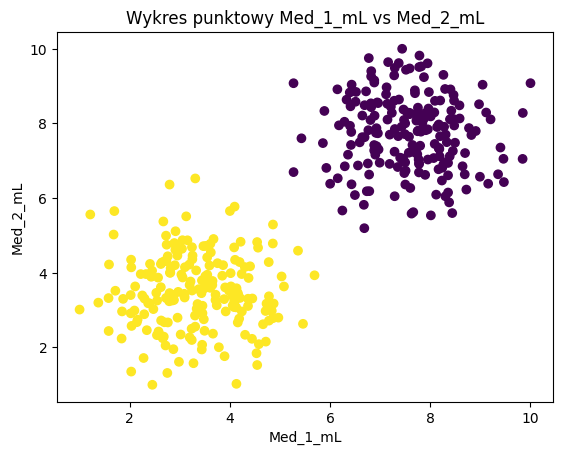

In [11]:
# Krok 2.2: Wizualizacja danych
plt.scatter(data['Med_1_mL'], data['Med_2_mL'], c=data['VIRUS'], cmap='viridis')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.title('Wykres punktowy Med_1_mL vs Med_2_mL')
plt.show()

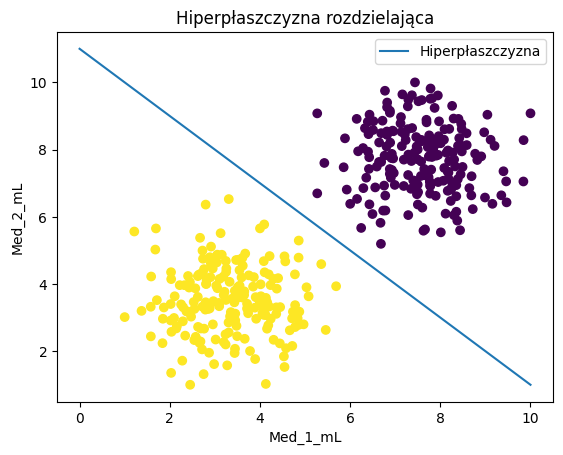

In [13]:
# Krok 2.3: Utworzenie hiperpłaszczyzny rozdzielającej
x_values = np.linspace(0, 10, 100)
y_values = -x_values + 11
plt.plot(x_values, y_values, label='Hiperpłaszczyzna')
plt.scatter(data['Med_1_mL'], data['Med_2_mL'], c=data['VIRUS'], cmap='viridis')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.title('Hiperpłaszczyzna rozdzielająca')
plt.show()

In [14]:
# Podział zbioru danych
X = data[['Med_1_mL', 'Med_2_mL']]
y = data['VIRUS']

In [15]:
# Stworzenie modelu SVM
model = SVC(C=1000, kernel='linear')
model.fit(X, y)

SVC(C=1000, kernel='linear')

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


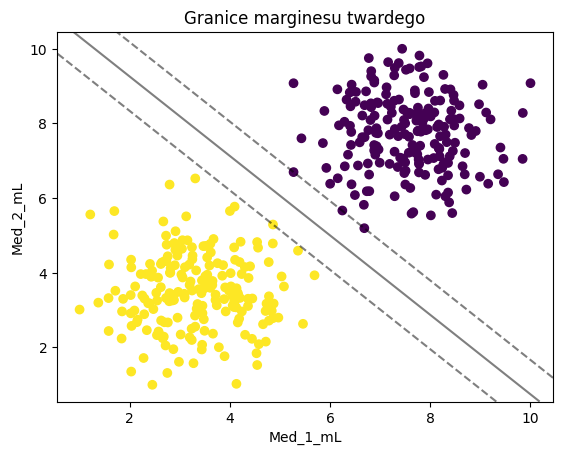

In [16]:
# Wykres z granicą marginesu twardego
plt.scatter(data['Med_1_mL'], data['Med_2_mL'], c=data['VIRUS'], cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.title('Granice marginesu twardego')
plt.show()

In [17]:
# Zmiana parametru regularyzacji
model.C = 0.05
model.fit(X, y)

SVC(C=0.05, kernel='linear')

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


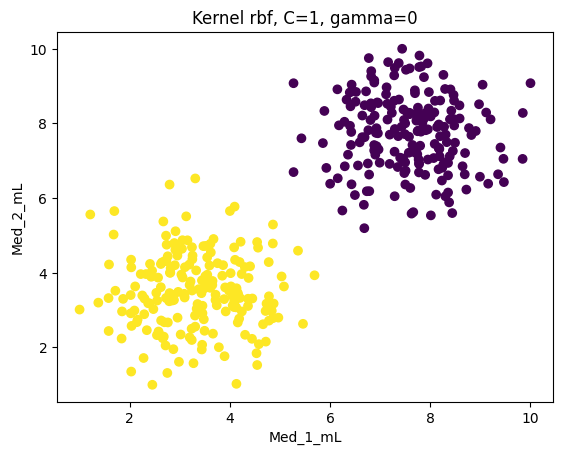

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


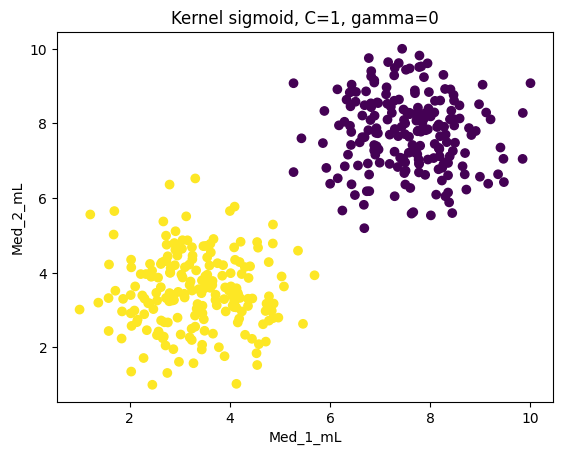

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


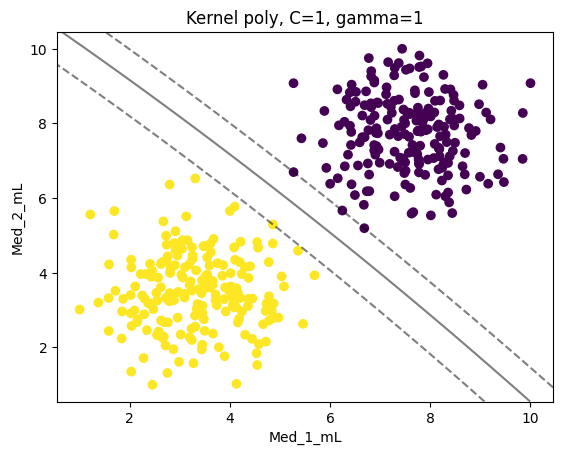

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


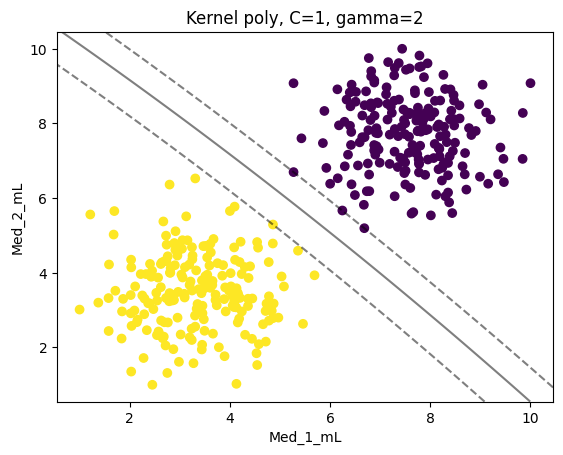

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


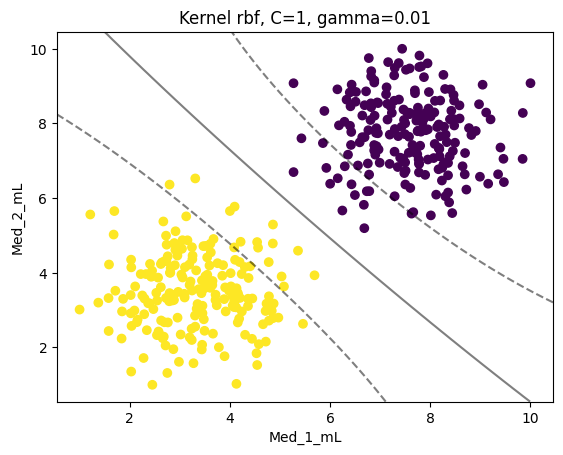

In [19]:
# Dobór funkcji jądra
kernels = ['rbf', 'sigmoid', 'poly', 'poly', 'rbf']
parameters = [(1, 0), (1, 0), (1, 1), (1, 2), (1, 0.01)]

for kernel, param in zip(kernels, parameters):
    model = SVC(C=param[0], kernel=kernel, gamma=param[1])
    model.fit(X, y)
    plt.scatter(data['Med_1_mL'], data['Med_2_mL'], c=data['VIRUS'], cmap='viridis')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.xlabel('Med_1_mL')
    plt.ylabel('Med_2_mL')
    plt.title(f'Kernel {kernel}, C={param[0]}, gamma={param[1]}')
    plt.show()

In [20]:
# Regulacja modelu - GridSearch
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_model.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [24]:
# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
# Ustawienie optymalnych parametrów
optimal_params = grid_model.best_params_
model = SVC(C=optimal_params['C'], kernel=optimal_params['kernel'])
model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [26]:
# Predykcja i ewaluacja
predictions = model.predict(X_test)
print("Raport klasyfikacji:\n", classification_report(y_test, predictions))
print("Macierz błędów:\n", confusion_matrix(y_test, predictions))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Macierz błędów:
 [[22  0]
 [ 0 18]]
